In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [83]:
# load the dataset from the weatherinszeged table from Thinkful's database.  

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# No need for an open connection, because you're only doing a single query
engine.dispose()

In [84]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [85]:
# Build a regression model where the target variable is temperature. 
# As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

Y=weather_df['temperature']
X=weather_df[['humidity','windspeed','windbearing','pressure']]
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
#X_train.shape,X_test.shape,Y_train.shape

In [86]:
#X_train=sm.add_constant(X_train) #we dont need this line
#results=sm.OLS(Y_train,X_train).fit()
X_constant=sm.add_constant(X)
results=sm.OLS(Y,X_constant).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:00:25   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#check if your model meets the Gauss-Markov conditions. 
#If some are not met, discuss the implications of the violations for the correctness of your model.

# Assumption 1: Linearity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

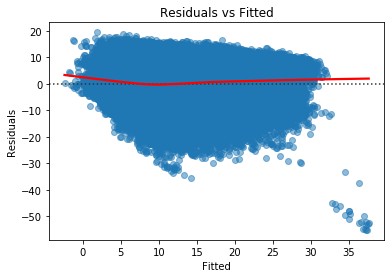

In [87]:

fig, ax = plt.subplots(1, 1)
sns.residplot(results.predict(), Y, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

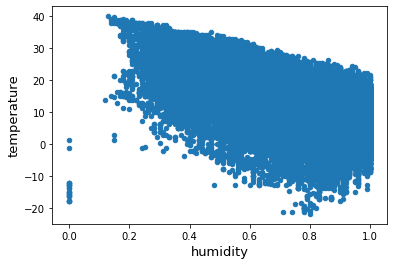

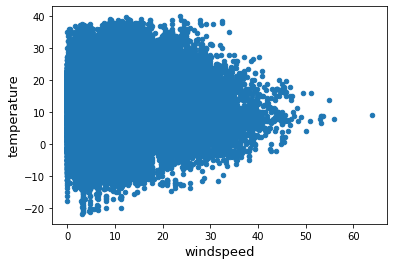

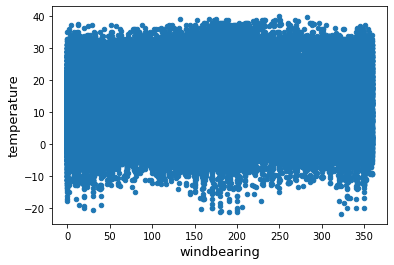

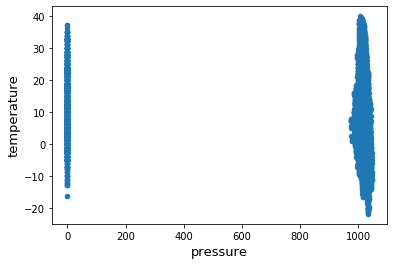

In [88]:

weather_df.plot.scatter(x='humidity', y='temperature')
plt.xlabel('humidity', fontsize=13)
plt.ylabel('temperature', fontsize=13)
plt.show()

weather_df.plot.scatter(x='windspeed', y='temperature')
plt.xlabel('windspeed', fontsize=13)
plt.ylabel('temperature', fontsize=13)
plt.show()

weather_df.plot.scatter(x='windbearing', y='temperature')
plt.xlabel('windbearing', fontsize=13)
plt.ylabel('temperature', fontsize=13)
plt.show()

weather_df.plot.scatter(x='pressure', y='temperature')
plt.xlabel('pressure', fontsize=13)
plt.ylabel('temperature', fontsize=13)
plt.show()

In [66]:
weather_df.corr()['temperature']

temperature            1.000
apparenttemperature    0.993
humidity              -0.632
windspeed              0.009
windbearing            0.030
visibility             0.393
loudcover                nan
pressure              -0.005
Name: temperature, dtype: float64

# Assumption 2: No Multicollinearity

In [99]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] =['humidity','windspeed','windbearing','pressure']
print(vif)


   VIF Factor     features
0      13.072     humidity
1       3.405    windspeed
2       3.997  windbearing
3      17.693     pressure


# Assumption 3: Normality of error term

In [101]:
from scipy.stats import normaltest
normaltest(results.predict()- Y)

NormaltestResult(statistic=3375.4323076996025, pvalue=0.0)

In [102]:
from scipy.stats import jarque_bera
jarque_bera(results.predict()- Y)

(3793.2967352523883, 0.0)

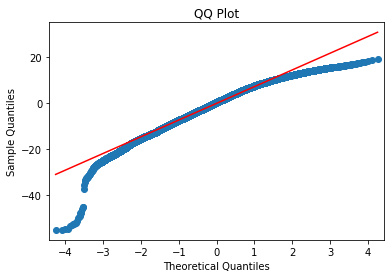

In [103]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(results.resid).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

# Assumption 4: Uncorrelated error term

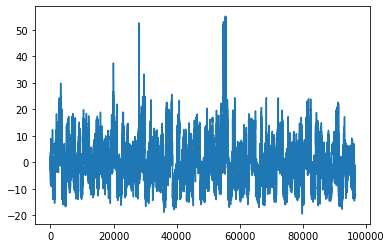

In [105]:
plt.plot(results.predict()- Y)

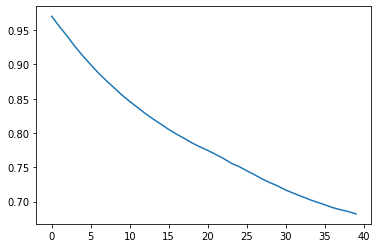

In [118]:
from statsmodels.tsa.stattools import acf
acf_data=acf( Y-results.predict())
plt.plot(acf_data[1:])

# Assumption 5: Homoscedasticity

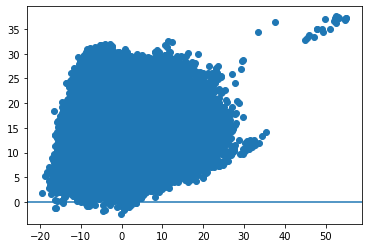

In [111]:
plt.scatter(results.predict()- Y,results.predict())
plt.axhline(y=0)

In [115]:
from scipy.stats import levene
levene(results.predict(),results.predict()- Y)

LeveneResult(statistic=2321.240100857485, pvalue=0.0)

In [116]:
from scipy.stats import bartlett
bartlett(results.predict(),results.predict()- Y)

BartlettResult(statistic=2464.844656867718, pvalue=0.0)

[Text(0, 0.5, 'Standardized Residuals'), Text(0.5, 0, 'Fitted')]

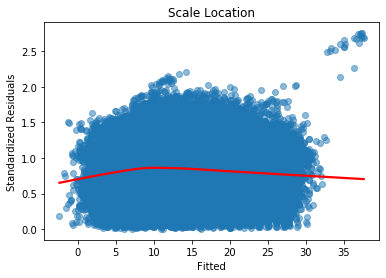

In [117]:
fig, ax = plt.subplots(1, 1)
standardized_resid1 = np.sqrt(np.abs(results.get_influence().resid_studentized_internal))
sns.regplot(results.predict(), standardized_resid1, color='#1f77b4', lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Scale Location')
ax.set(xlabel='Fitted', ylabel='Standardized Residuals')

# Assumption 6: No Endogeneity

# 2. House prices

In [135]:
# Load the houseprices data from Thinkful's database.
# Reimplement the model that you built in the previous lesson.
# Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# No need for an open connection, because you're only doing a single query
engine.dispose()

In [136]:
prices_df.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500


In [137]:
non_numeric_columns = prices_df.select_dtypes(['object']).columns
numeric_columns = prices_df.select_dtypes(['int64', 'float64']).columns

In [138]:
# Missing Data
prices_df.isnull().sum().sort_values(ascending=False).head(20)

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
fireplacequ      690
lotfrontage      259
garagecond        81
garagetype        81
garageyrblt       81
garagefinish      81
garagequal        81
bsmtexposure      38
bsmtfintype2      38
bsmtfintype1      37
bsmtcond          37
bsmtqual          37
masvnrarea         8
masvnrtype         8
electrical         1
utilities          0
dtype: int64

In [149]:
np.abs(price_df[numeric_columns].corr().loc[:,'saleprice']).sort_values(ascending=False)

saleprice       1.000
overallqual     0.791
grlivarea       0.709
garagecars      0.640
garagearea      0.623
totalbsmtsf     0.614
firstflrsf      0.606
fullbath        0.561
totrmsabvgrd    0.534
yearbuilt       0.523
yearremodadd    0.507
garageyrblt     0.486
masvnrarea      0.477
fireplaces      0.467
bsmtfinsf1      0.386
lotfrontage     0.352
wooddecksf      0.324
secondflrsf     0.319
openporchsf     0.316
halfbath        0.284
lotarea         0.264
bsmtfullbath    0.227
bsmtunfsf       0.214
bedroomabvgr    0.168
kitchenabvgr    0.136
enclosedporch   0.129
screenporch     0.111
poolarea        0.092
mssubclass      0.084
overallcond     0.078
mosold          0.046
threessnporch   0.045
yrsold          0.029
lowqualfinsf    0.026
id              0.022
miscval         0.021
bsmthalfbath    0.017
bsmtfinsf2      0.011
Name: saleprice, dtype: float64

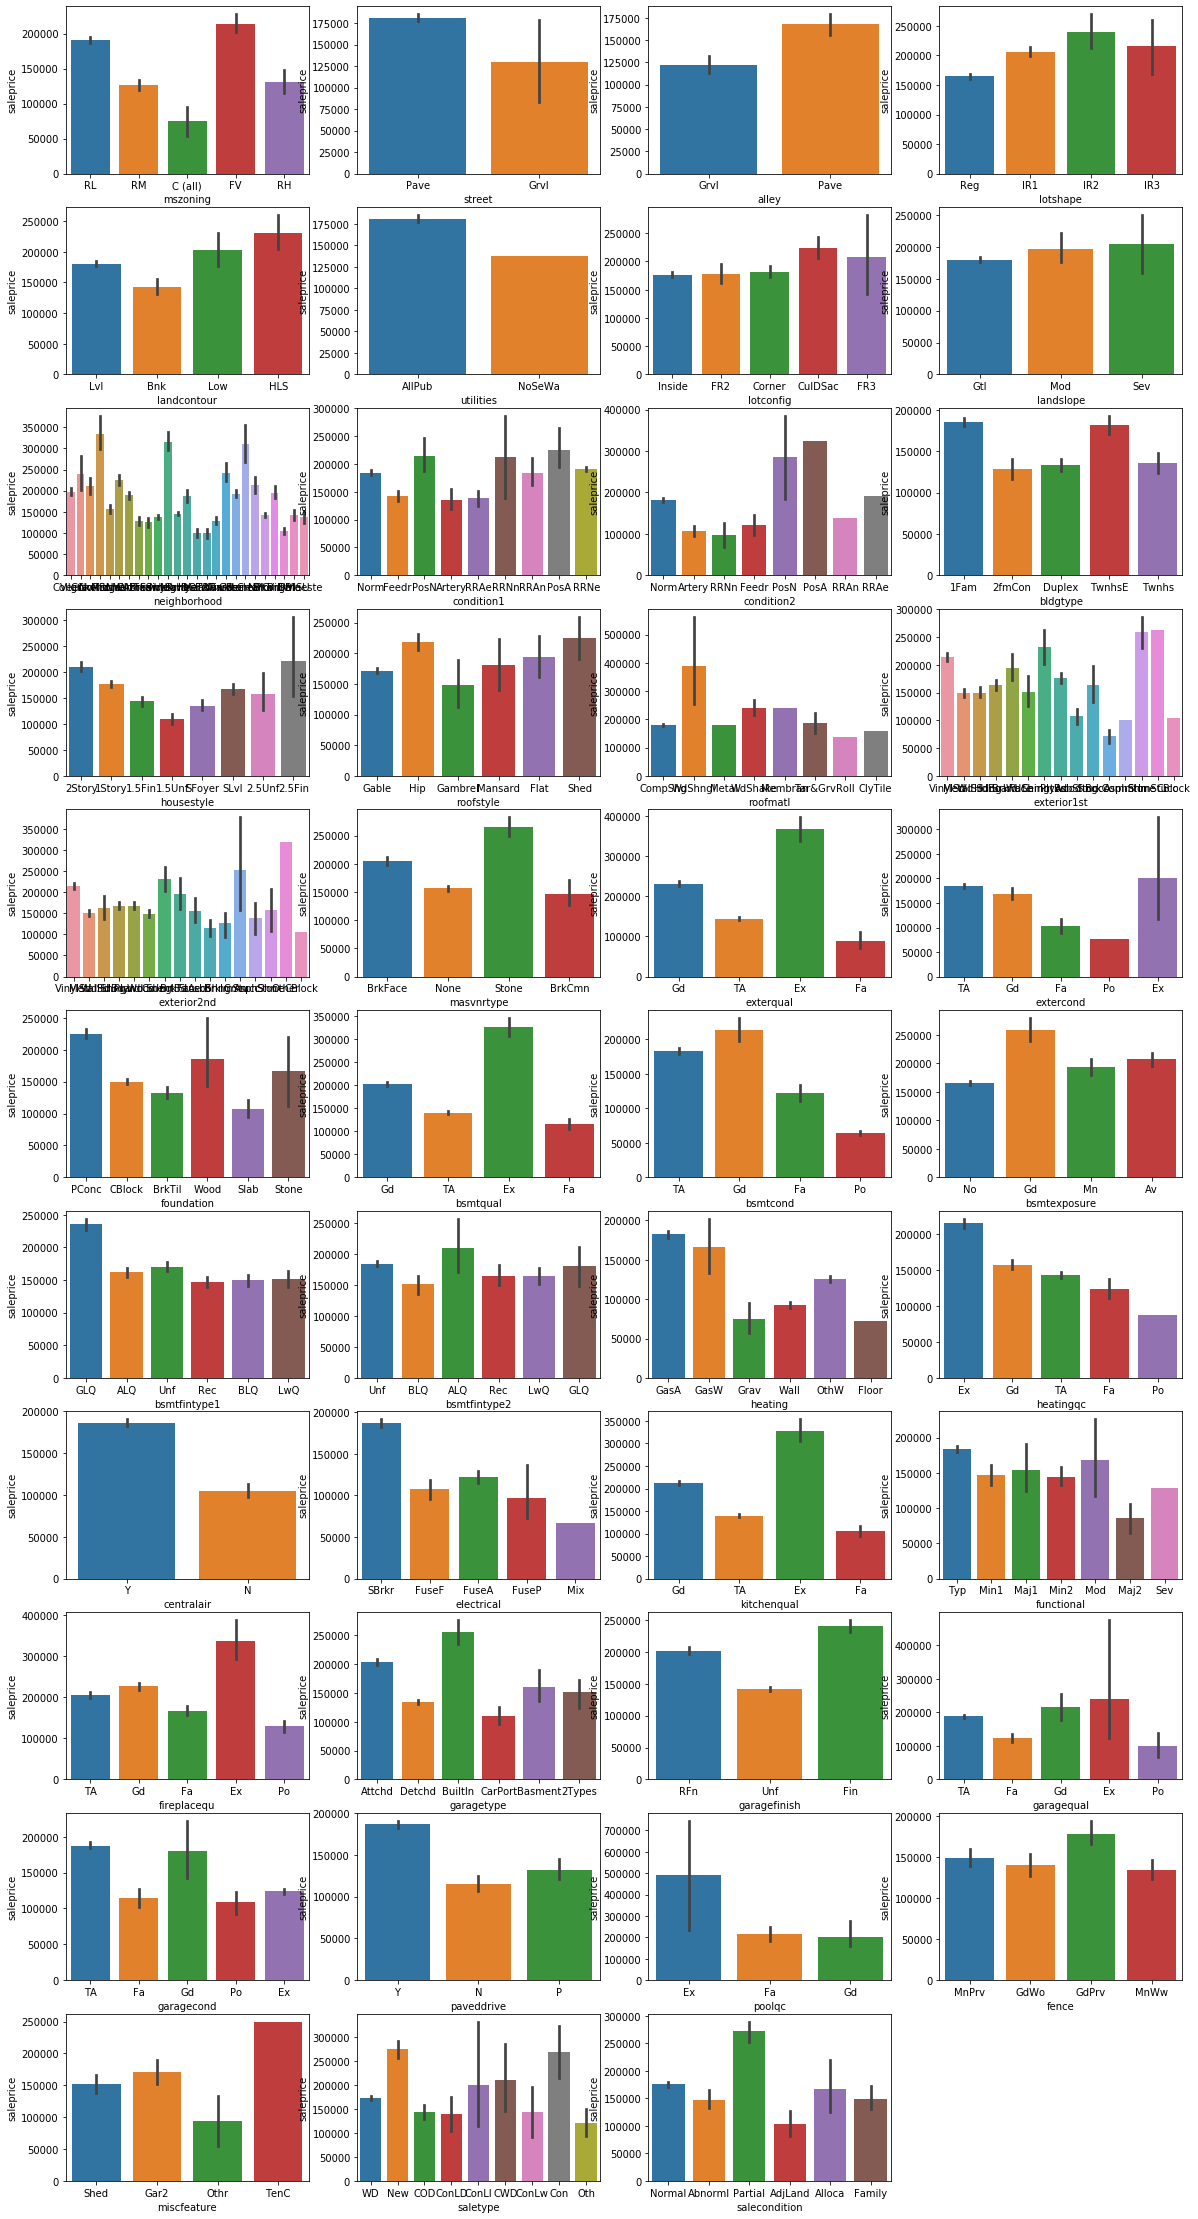

In [160]:
i=0
plt.figure(figsize=(20,40))
for i,c in enumerate(non_numeric_columns):
    plt.subplot(11,4,i+1)
    sns.barplot(price_df[c],price_df['saleprice'])
plt.show()    

In [161]:
price_df[non_numeric_columns].isna().sum()

mszoning            0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
exterqual           0
extercond           0
foundation          0
bsmtqual           37
bsmtcond           37
bsmtexposure       38
bsmtfintype1       37
bsmtfintype2       38
heating             0
heatingqc           0
centralair          0
electrical          1
kitchenqual         0
functional          0
fireplacequ       690
garagetype         81
garagefinish       81
garagequal         81
garagecond         81
paveddrive          0
poolqc           1453
fence            1179
miscfeature      1406
saletype            0
salecondition       0
dtype: int64

In [163]:
new_df=price_df[['mszoning','street','landcontour','exterqual','kitchenqual']]

In [189]:
new_df=pd.get_dummies(new_df,drop_first=True)
new_df

,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,exterqual_Fa,exterqual_Gd,exterqual_TA,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA
0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
2,0,0,1,0,1,0,0,1,0,1,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,1,0,1,0
4,0,0,1,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,1,0,0,1
1456,0,0,1,0,1,0,0,1,0,0,1,0,0,1
1457,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,1,0,1,0


In [190]:
X=pd.concat([new_numeric,new_df],axis=1)
X

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,firstflrsf,fullbath,mszoning_FV,mszoning_RH,mszoning_RL,...,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,exterqual_Fa,exterqual_Gd,exterqual_TA,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA
0,7,1710,2,548,856,856,2,0,0,1,...,1,0,0,1,0,1,0,0,1,0
1,6,1262,2,460,1262,1262,2,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,7,1786,2,608,920,920,2,0,0,1,...,1,0,0,1,0,1,0,0,1,0
3,7,1717,3,642,756,961,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
4,8,2198,3,836,1145,1145,2,0,0,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1456,6,2073,2,500,1542,2073,2,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1457,7,2340,1,252,1152,1188,2,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1458,5,1078,1,240,1078,1078,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [191]:
Y=price_df['saleprice']

In [193]:
X=sm.add_constant(X)
resultsP=sm.OLS(Y,X).fit()
resultsP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        05:52:55   Log-Likelihood:                -17344.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1438   BIC:                         3.485e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5210.1067   2.11e+04     -0.247      0.805   -4.67e+04    3.62e+04
overallqual      1.581e+04   1205.506     13.115      0.000    1.34e+04    1.82e+04
grlivarea          46.0464      2.734     16.845      0.000      40.684      51.409
garagecars       1.334e+04   2813.782      4.742      0.000    7824.168    1.89e+04
garagearea          5.1524      9.693      0.532      0.595     -13.861      24.166
totalbsmtsf        17.5021      3.957      4.423      0.000       9.739      25.265
firstflrsf          4.7549      4.675      1.017      0.309      -4.416      13.926
fullbath        -1072.5438   2405.184     -0.446      0.656   -5790.590    3645.502
mszoning_FV      3.941e+04   1.28e+04      3.074      0.002    1.43e+04    6.46e+04
mszoning_RH      3.029e+04   1.47e+04      2.065      0.039    1519.111    5.91e+04
mszoning_RL      4.267e+04   1.19e+04      3.582      0.000    1.93e+04     6.6e+04
mszoning_RM      2.377e+04    1.2e+04      1.974      0.049     154.571    4.74e+04
street_Pave     -5669.8320   1.57e+04     -0.361      0.718   -3.64e+04    2.51e+04
landcontour_HLS  3.898e+04   6833.415      5.704      0.000    2.56e+04    5.24e+04
landcontour_Low  4.417e+04   7520.688      5.873      0.000    2.94e+04    5.89e+04
landcontour_Lvl  1.975e+04   4751.410      4.156      0.000    1.04e+04    2.91e+04
exterqual_Fa    -4.191e+04   1.32e+04     -3.174      0.002   -6.78e+04    -1.6e+04
exterqual_Gd    -3.619e+04   6218.983     -5.819      0.000   -4.84e+04    -2.4e+04
exterqual_TA    -4.709e+04   6893.554     -6.831      0.000   -6.06e+04   -3.36e+04
kitchenqual_Fa  -4.586e+04   8089.632     -5.669      0.000   -6.17e+04      -3e+04
kitchenqual_Gd   -3.81e+04   4672.443     -8.155      0.000   -4.73e+04   -2.89e+04
kitchenqual_TA  -4.767e+04   5207.506     -9.155      0.000   -5.79e+04   -3.75e+04
==============================================================================
Omnibus:                      535.978   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62379.437
Skew:                          -0.672   Prob(JB):                         0.00
Kurtosis:                      34.994   Cond. No.                     6.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption 1: Linearity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

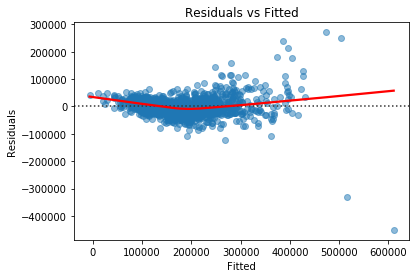

In [194]:
fig, ax = plt.subplots(1, 1)
sns.residplot(resultsP.predict(), Y, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

# Assumption 2: No Multicollinearity

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF factores']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features']=['const', 'overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'totalbsmtsf', 'firstflrsf', 'fullbath', 'mszoning_FV', 'mszoning_RH',
       'mszoning_RL', 'mszoning_RM', 'street_Pave', 'landcontour_HLS',
       'landcontour_Low', 'landcontour_Lvl', 'exterqual_Fa', 'exterqual_Gd',
       'exterqual_TA', 'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA']
print(vif)

    VIF factores         features
0        527.009            const
1          3.278      overallqual
2          2.433        grlivarea
3          5.214       garagecars
4          5.065       garagearea
5          3.554      totalbsmtsf
6          3.852       firstflrsf
7          2.071         fullbath
8          8.250      mszoning_FV
9          2.752      mszoning_RH
10        27.942      mszoning_RL
11        21.716      mszoning_RM
12         1.189      street_Pave
13         1.822  landcontour_HLS
14         1.605  landcontour_Low
15         2.441  landcontour_Lvl
16         1.954     exterqual_Fa
17        10.156     exterqual_Gd
18        13.205     exterqual_TA
19         2.008   kitchenqual_Fa
20         6.190   kitchenqual_Gd
21         8.000   kitchenqual_TA


# Assumption 3: Normality of error term

In [212]:
error=Y-resultsP.predict()
from scipy.stats import normaltest
normaltest(Y-resultsP.predict())

NormaltestResult(statistic=535.977607804823, pvalue=4.110941089693798e-117)

In [ ]:
Not normal pvalue<0.05

# Assumption 4: Uncorrelated error term

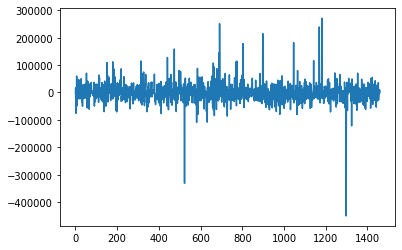

In [214]:
plt.plot(error)

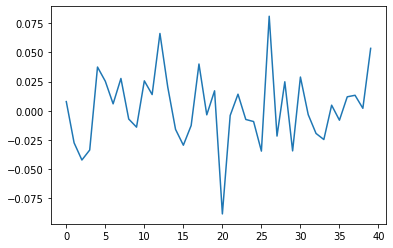

In [215]:
from statsmodels.tsa.stattools import acf
acf_data=acf( Y-resultsP.predict())
plt.plot(acf_data[1:])

# Assumption 5: Homoscedasticity

In [216]:
from scipy.stats import levene
levene(resultsP.predict(),error)

LeveneResult(statistic=556.7069958501503, pvalue=8.433874857983543e-113)

In [ ]:
p<0.05 errors are heteroscedastic

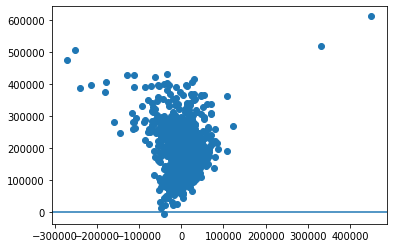

In [217]:
plt.scatter(results.predict()- Y,results.predict())
plt.axhline(y=0)